<a href="https://colab.research.google.com/github/rinaove/KAGGLE/blob/main/%5B4%EC%A3%BC%EC%B0%A8%5D_%EC%8A%A4%ED%8E%98%EC%9D%B4%EC%8A%A4_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic Dataset with TensorFlow Decision Forests

> 목표
- [x] 재밌는 데이터셋 경험하기
- [x] 새로운 모델링 기법 배우기
- [x] 나만의 EDA 방법 강구

> 데이터셋 개요

2912년, 당신의 데이터 과학 기술이 우주적 미스터리를 해결하는 데 필요합니다. 우리는 4광년 떨어진 곳에서 수신된 신호를 받았으며, 상황이 심상치 않습니다.

'우주선 타이타닉(Spaceship Titanic)'은 한 달 전에 발사된 성간(星間) 여객선으로, 약 13,000명의 승객을 태우고 태양계를 떠나 세 개의 새로이 거주 가능한 외계 행성으로 이주하는 사람들을 수송하고 있었습니다.

첫 번째 목적지인 ‘타는 듯한 55 Cancri E’로 향하던 중, 우주선 타이타닉은 알파 센타우리(Alpha Centauri) 근방의 먼지 구름 속에 숨겨져 있던 시공간 이상(spacetime anomaly)과 충돌했습니다.

안타깝게도, 1000년 전의 동명(同名) 배처럼 비극적인 운명을 맞이했습니다. 다행히도 우주선 자체는 파괴되지 않았지만, 승객의 거의 절반이 다른 차원(alternate dimension)으로 전송되고 말았습니다!

- - -

구조대가 실종된 승객들을 구출할 수 있도록, 당신은 우주선의 손상된 컴퓨터 시스템에서 복구된 기록을 바탕으로 누가 시공간 이상에 의해 다른 차원으로 전송되었는지를 예측해야 합니다.

그들을 구하고 역사를 바꾸는 데 당신의 힘이 필요합니다!

> 데이터셋 설명

📄 파일 설명

| 파일 이름               | 설명                                                                 |
|------------------------|----------------------------------------------------------------------|
| `train.csv`            | 약 8700명의 승객 개인 기록이 담긴 훈련용 데이터셋                                 |
| `test.csv`             | 나머지 약 4300명의 승객 기록이 담긴 테스트 데이터셋                                |
| `sample_submission.csv`| 제출 형식 예시가 담긴 파일. `test.csv`의 `PassengerId`에 대한 예측값 포함          |

---

📊 컬럼 설명

| 컬럼 이름         | 설명                                                                                  |
|------------------|-----------------------------------------------------------------------------------------|
| `PassengerId`    | 각 승객의 고유 ID. 형식은 `gggg_pp`로, `gggg`는 그룹 ID, `pp`는 그룹 내 승객 번호               |
| `HomePlanet`     | 승객이 출발한 행성 (보통 영구 거주지)                                                         |
| `CryoSleep`      | 승객이 여행 동안 냉동수면(CryoSleep)을 선택했는지 여부 (`True` 또는 `False`)                  |
| `Cabin`          | 승객이 머무는 객실. 형식은 `데크/번호/측면` (`측면`: Port(P) 또는 Starboard(S))                  |
| `Destination`    | 승객의 목적지 행성                                                                         |
| `Age`            | 승객의 나이                                                                               |
| `VIP`            | VIP 서비스를 이용했는지 여부 (`True` 또는 `False`)                                          |
| `RoomService`    | 룸서비스에 사용한 금액                                                                       |
| `FoodCourt`      | 푸드코트에서 사용한 금액                                                                      |
| `ShoppingMall`   | 쇼핑몰에서 사용한 금액                                                                       |
| `Spa`            | 스파에서 사용한 금액                                                                         |
| `VRDeck`         | VR 데크에서 사용한 금액                                                                      |
| `Name`           | 승객의 이름 (성 + 이름)                                                                      |
| `Transported`    | 승객이 다른 차원으로 이동했는지 여부 (`True` 또는 `False`) — **예측해야 할 목표값 (target)**      |

## Import the library


In [35]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.18.0
TensorFlow Decision Forests v1.11.0


## Load the Dataset

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
dataset_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


In [39]:
dataset_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Let us quickly do a basic exploration of the dataset

In [40]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [41]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Bar chart for label column: Transported

예측해야 되는 목표값 (y=0/1 분류) 확인

<Axes: xlabel='Transported'>

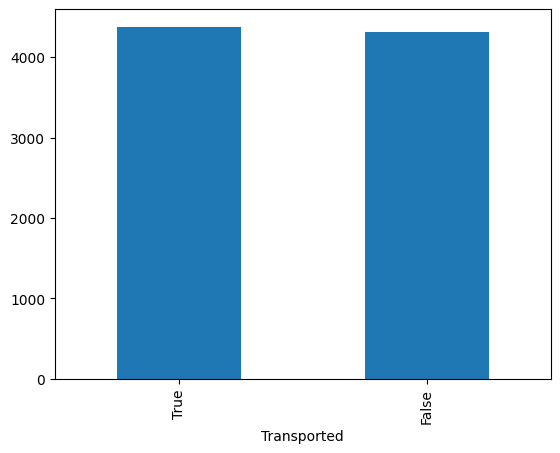

In [42]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

> 알게 된 점

* train데이터에서 승객이 다른 차원으로 이동한 경우(예측해야 할 값)는 거의 절반에 가까움

## Numerical data distribution

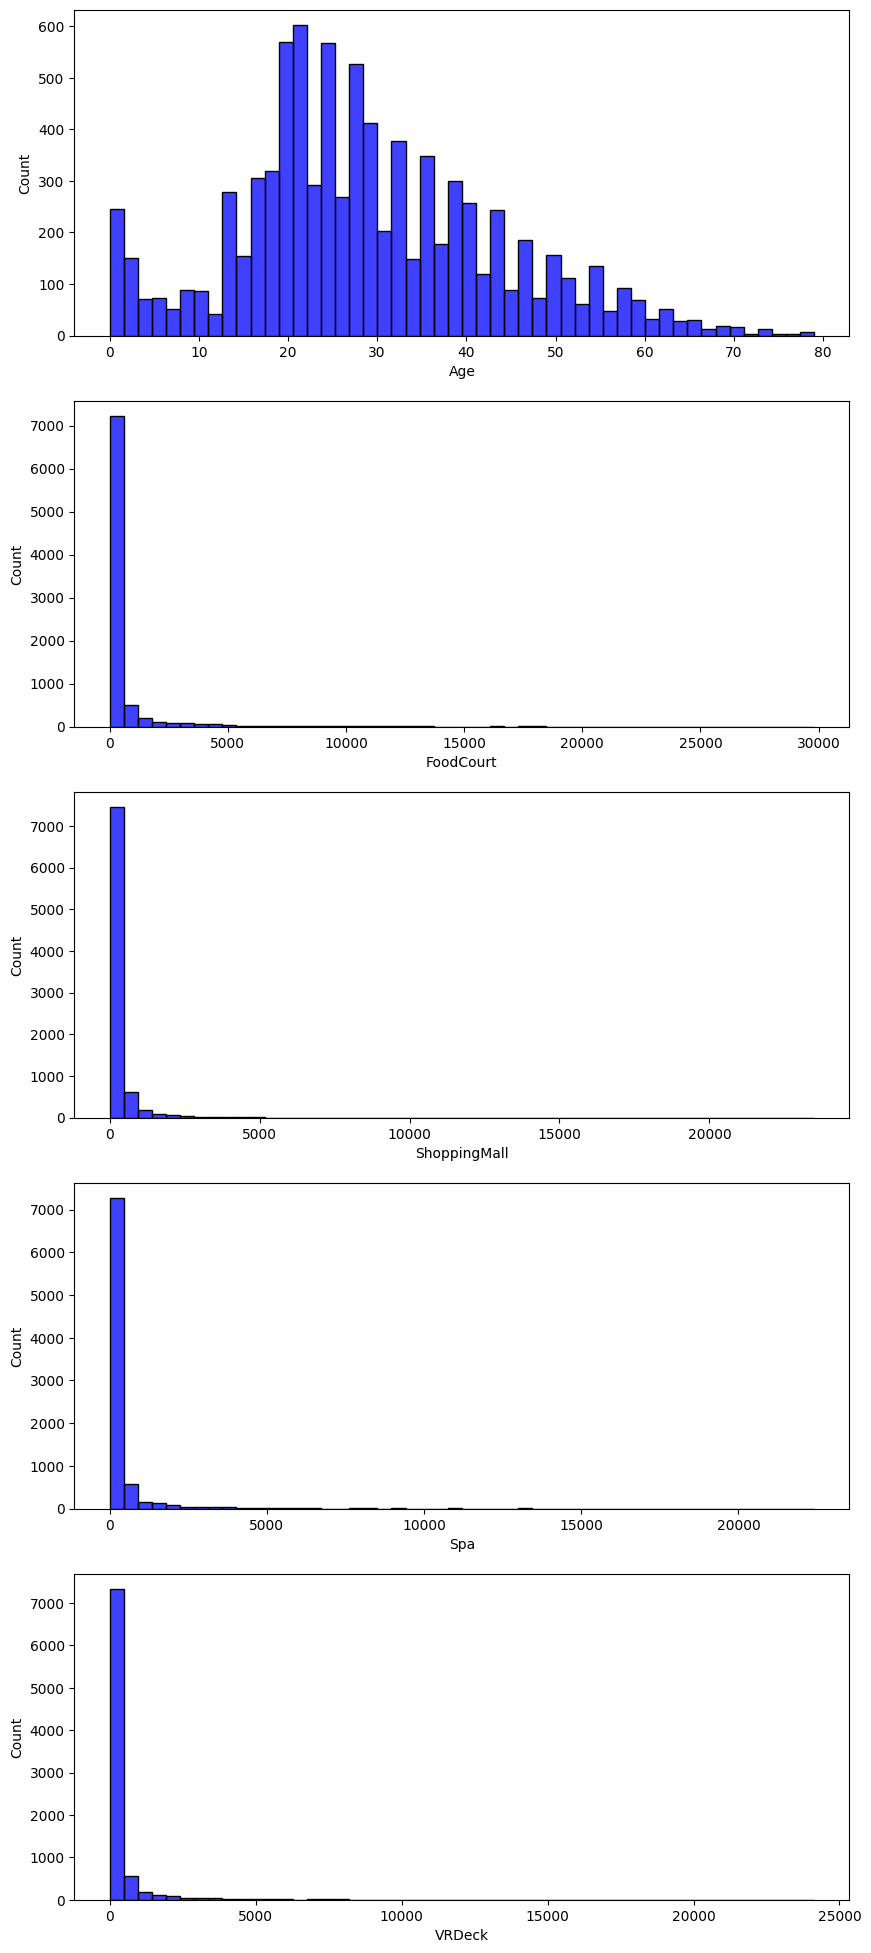

In [43]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

## Prepare the dataset

> 아쉬운 점

* 타이타닉에서는 가족 혹은 지위에 따라 생존율이 유의미한 경우도 존재
* 그냥 이름을 버리기는 아깝지 않나

## 추가 분석) LastName과 Transported의 연관성

In [44]:
# 결측치 제거 (Name 컬럼이 null인 경우 제외)
dataset_df_nonull = dataset_df[dataset_df['Name'].notnull()]

# 두 번째 단어(성) 추출
dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(
    lambda x: x.split()[1] if len(x.split()) > 1 else None
)

# 고유 성의 빈도수 카운트
last_name_counts = dataset_df_nonull['LastName'].value_counts()

# 결과 확인
print(last_name_counts)

LastName
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Fulloydez     14
              ..
Maglible       1
Valing         1
Curry          1
Halexandez     1
Goods          1
Name: count, Length: 2217, dtype: int64


/tmp/ipython-input-44-4195218075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(


/tmp/ipython-input-45-1695643082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(


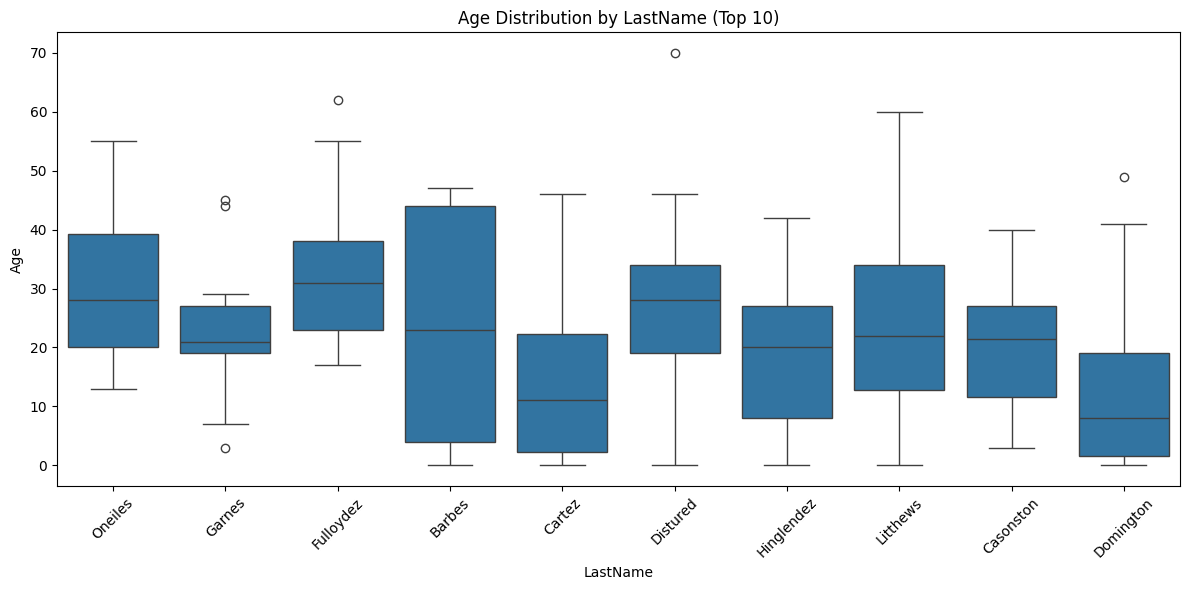

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이름에서 성 추출 (한 번만 수행했다면 생략 가능)
dataset_df_nonull = dataset_df[dataset_df['Name'].notnull() & dataset_df['Age'].notnull()]
dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(
    lambda x: x.split()[1] if len(x.split()) > 1 else None
)

# 상위 10개 성만 추출
top_lastnames = dataset_df_nonull['LastName'].value_counts().head(10).index
subset_df = dataset_df_nonull[dataset_df_nonull['LastName'].isin(top_lastnames)]

# 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_df, x='LastName', y='Age')
plt.title('Age Distribution by LastName (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

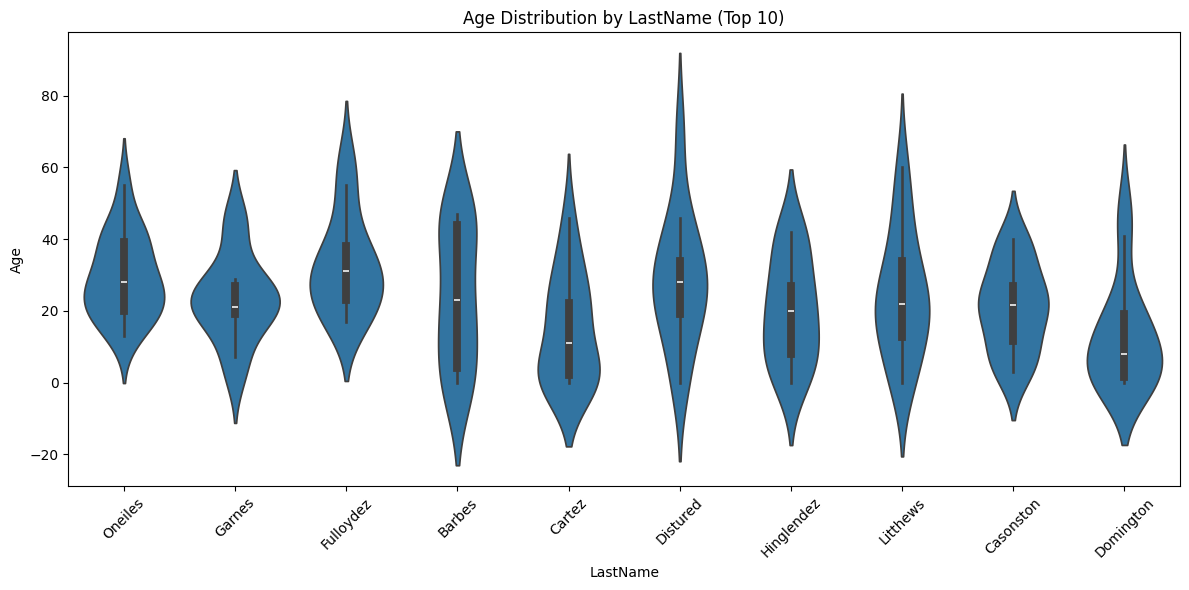

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이름과 나이 결측치 제거
dataset_df_nonull = dataset_df[dataset_df['Name'].notnull() & dataset_df['Age'].notnull()].copy()

# LastName 추출
dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(
    lambda x: x.split()[1] if len(x.split()) > 1 else None
)

# 출현 빈도 상위 10개 성만 선택
top_lastnames = dataset_df_nonull['LastName'].value_counts().head(10).index
subset_df = dataset_df_nonull[dataset_df_nonull['LastName'].isin(top_lastnames)]

# Violinplot 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=subset_df, x='LastName', y='Age', inner='box')  # inner='box'로 중앙값/사분위 포함
plt.title('Age Distribution by LastName (Top 10)')
plt.xlabel('LastName')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

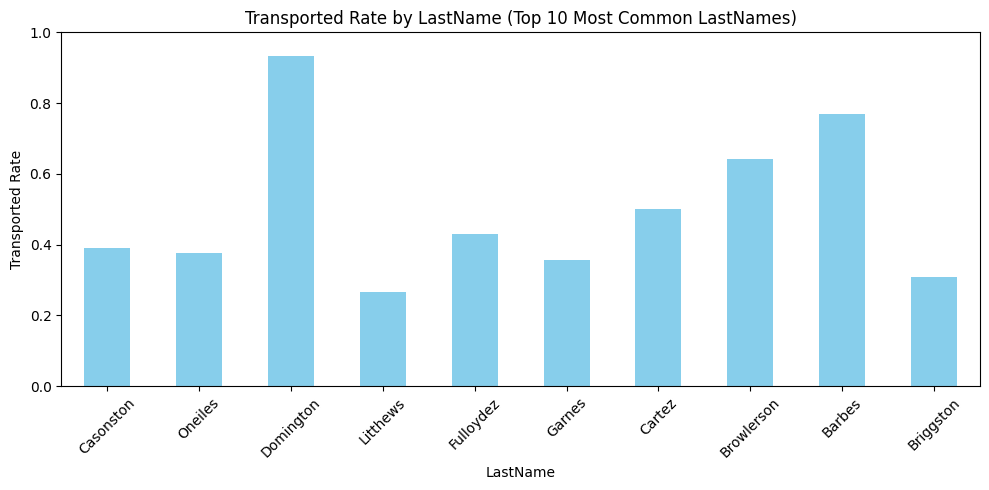

In [47]:
# 결측치 제거
dataset_df_nonull = dataset_df[dataset_df['Name'].notnull() & dataset_df['Transported'].notnull()].copy()

# LastName 추출
dataset_df_nonull['LastName'] = dataset_df_nonull['Name'].apply(
    lambda x: x.split()[1] if len(x.split()) > 1 else None
)

# LastName별 Transported 비율
transported_by_lastname = dataset_df_nonull.groupby('LastName')['Transported'].mean().sort_values(ascending=False)

# 상위 10개 성만 시각화
top_lastnames = dataset_df_nonull['LastName'].value_counts().head(10).index
subset = transported_by_lastname.loc[top_lastnames]

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
subset.plot(kind='bar', color='skyblue')
plt.title('Transported Rate by LastName (Top 10 Most Common LastNames)')
plt.ylabel('Transported Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import chi2_contingency

# 빈도 수가 많은 성만 선택
top_lastnames = dataset_df_nonull['LastName'].value_counts()
common_lastnames = top_lastnames[top_lastnames >= 10].index

# 교차표 만들기
crosstab = pd.crosstab(dataset_df_nonull[dataset_df_nonull['LastName'].isin(common_lastnames)]['LastName'],
                       dataset_df_nonull['Transported'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-squared test statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Chi-squared test statistic: 95.40
P-value: 0.0562


In [49]:
# 분석할 변수들
variables = ['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck']

# 성씨별로 평균과 표준편차 보기
summary = dataset_df_nonull.groupby('LastName')[variables].agg(['mean', 'std', 'count'])

# 상위 성씨만 추려보기
summary.loc[common_lastnames].head(10)

Age                  RoomService                     \
                 mean        std count        mean          std count   
LastName                                                                
Casonston   20.833333  12.001225    18   34.833333    97.897455    18   
Oneiles     29.500000  11.430952    16  388.500000  1124.910485    16   
Domington   12.866667  14.946890    15    0.000000     0.000000    15   
Litthews    24.285714  17.446307    14  176.333333   397.031605    15   
Fulloydez   32.846154  13.819347    13  366.071429   482.041726    14   
Garnes      23.538462  11.899688    13   77.785714   194.251692    14   
Cartez      14.714286  15.076362    14    0.571429     2.138090    14   
Browlerson  19.923077  16.484647    13   89.071429   316.643081    14   
Barbes      23.846154  19.252040    13  301.307692   806.434476    13   
Briggston   30.230769  13.336378    13  119.923077   237.050790    13   

             FoodCourt                           Spa                    \
                  mean         std count        mean         std count   
LastName                                                                 
Casonston   161.666667  427.478517    18   31.277778  129.223384    18   
Oneiles     256.312500  623.758256    16  151.125000  258.956335    16   
Domington     0.000000    0.000000    15    1.200000    4.647580    15   
Litthews     72.133333  186.588496    15   23.133333   57.688655    15   
Fulloydez   143.142857  266.097107    14   19.357143   48.390411    14   
Garnes        4.000000   14.966630    14   67.142857  204.110776    14   
Cartez      190.785714  281.849982    14   15.500000   36.702023    14   
Browlerson  242.428571  520.769654    14   29.384615  100.048770    13   
Barbes      129.384615  242.042193    13   25.750000   71.686343    12   
Briggston   261.384615  612.616865    13  309.083333  560.945218    12   

                VRDeck                    
                  mean         std count  
LastName                                  
Casonston   178.000000  305.714015    18  
Oneiles     299.125000  502.256492    16  
Domington     5.733333   22.205105    15  
Litthews    182.933333  523.763233    15  
Fulloydez    62.571429  200.206706    14  
Garnes      290.357143  587.023471    14  
Cartez      247.769231  619.173125    13  
Browlerson    9.000000   30.133038    14  
Barbes       63.916667  137.600514    12  
Briggston   122.538462  309.160588    13

## 추가 분석 2) PassengerId와 Transported의 연관성

In [50]:
# 그룹 ID 추출 (PassengerId에서 앞부분 gggg 추출)
dataset_df['GroupID'] = dataset_df['PassengerId'].apply(lambda x: x.split('_')[0])

In [51]:
dataset_df['GroupID'].value_counts()

,count
GroupID,
9081,8
4005,8
8988,8
5133,8
4256,8
...,...
0022,1
0016,1
0015,1


In [52]:
# 그룹별 평균 Transported 비율
group_transport_rate = dataset_df.groupby('GroupID')['Transported'].mean()

# 그룹 크기도 함께 계산
group_sizes = dataset_df['GroupID'].value_counts()

# 데이터프레임으로 결합
group_stats = pd.DataFrame({
    'GroupSize': group_sizes,
    'TransportedRate': group_transport_rate
}).dropna()

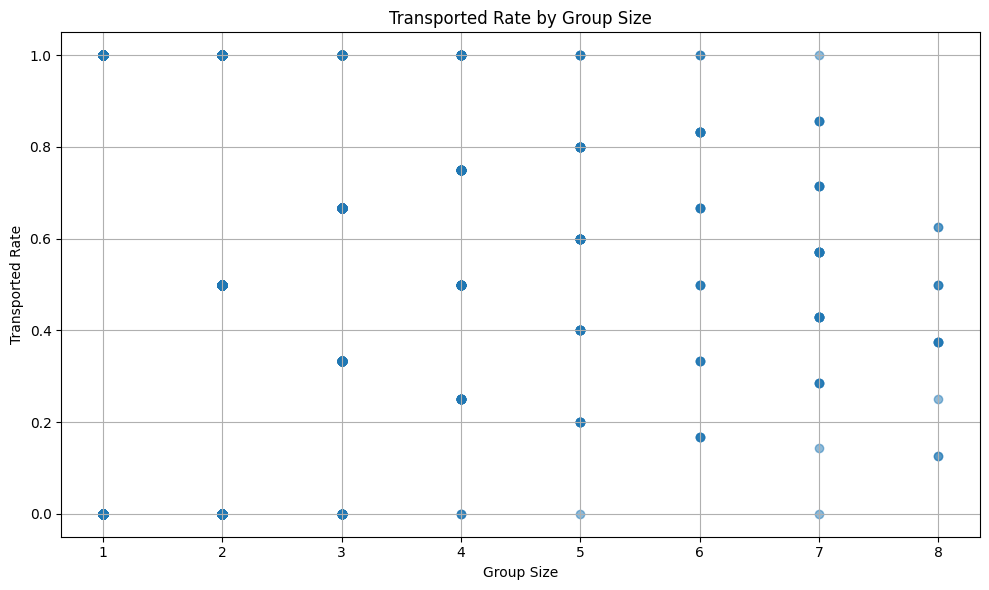

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(group_stats['GroupSize'], group_stats['TransportedRate'], alpha=0.5)
plt.xlabel('Group Size')
plt.ylabel('Transported Rate')
plt.title('Transported Rate by Group Size')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# 전원 생존 (Transported = 1.0) 또는 전원 미생존 (0.0) 그룹 수 계산
extreme_groups = group_stats[(group_stats['TransportedRate'] == 1.0) | (group_stats['TransportedRate'] == 0.0)]

# 전체 그룹 대비 비율
extreme_ratio = len(extreme_groups) / len(group_stats)
print(f"전원 생존 또는 전원 미생존한 그룹 비율: {extreme_ratio:.2%}")

전원 생존 또는 전원 미생존한 그룹 비율: 87.18%


## Prepare the dataset (진짜)

In [55]:
dataset_df = dataset_df.drop(['PassengerId', 'Name', 'GroupID'], axis=1)
dataset_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [56]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [57]:
dataset_df.isnull().sum().sort_values(ascending=False)

,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182
RoomService,181


하지만 이 데이터셋에는 결측값이 포함된 불리언(boolean) 필드도 있습니다. TF-DF는 아직 불리언 타입을 직접 지원하지 않기 때문에, 해당 필드들을 **정수(int)**로 변환해야 합니다. 이때 결측값은 0으로 대체하여 처리할 것입니다.

또한 이 노트북에서는 숫자형 열의 결측값도 모두 0으로 채워줄 예정이며, 범주형 열의 결측값만 TF-DF가 자동으로 처리하도록 둘 것입니다.

In [58]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)

,0
HomePlanet,201
Cabin,199
Destination,182
RoomService,181
Age,179
CryoSleep,0
VIP,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [59]:
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)

In [60]:
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

Cabin 열의 값은 Deck/Cabin_num/Side 형식의 문자열입니다.

여기서는 Cabin 열을 분할하여 Deck, Cabin_num, Side라는 3개의 새로운 열을 생성

In [61]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)

In [62]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [63]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


ㄴ아니 잠만 결측치 처리는 더 안함?

In [64]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6943 examples in training, 1750 examples in testing.


> 알게 된 점  
* test_indices = np.random.rand(len(dataset)) < test_ratio
len(dataset) 크기의 0~1 사이 랜덤 숫자 배열을 만들고,
* 그 값이 test_ratio보다 작은 인덱스를 테스트셋으로 지정.

In [65]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

> 알게 된 점

*  TensorFlow의 학습 입력 포맷은 tf.data.Dataset
TensorFlow (특히 tfdf.keras API)는 내부적으로 tf.data.Dataset 객체를 사용해 데이터를 처리.
* 이 형식은 미니배치 학습, 셔플, 반복 처리, GPU 최적화 등에 적합하도록 설계됨.

> 알게 된 점
* 🌲 TensorFlow Decision Forests (TF-DF)란?
  * TF-DF는 의사결정트리 기반의 머신러닝 모델(랜덤포레스트, 그래디언트 부스팅 트리 등)을 TensorFlow 환경에서 쉽게 사용할 수 있도록 해주는 라이브러리입니다.

| 특징                | 설명                                                     |
| ----------------- | ------------------------------------------------------ |
| **고성능 트리 모델 제공**  | 랜덤포레스트(Random Forest), 그래디언트 부스팅(GBDT), 카트(CART) 등을 지원 |
| **전처리 간소화**       | 범주형/수치형/결측값 등을 자동 처리, 피처 스케일링 불필요                      |
| **TensorFlow 통합** | `tf.keras` 모델처럼 사용할 수 있어, 다른 딥러닝 모델과 함께 쉽게 구성 가능       |
| **해석력**           | 트리 기반 모델이라 특성 중요도(feature importance) 등 해석이 용이         |
| **빠른 학습**         | 내부적으로 매우 최적화된 C++ 엔진 사용                                |

ㄴ 우와 신기하당

## Select a Model

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

In [66]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Configure the model

TensorFlow Decision Forests는 기본적으로 우수한 설정값(기본값)을 제공합니다.
예를 들어, 벤치마크 상위권 하이퍼파라미터들을 기반으로 하되, 학습 시간이 너무 길지 않도록 약간 수정된 형태로 제공됩니다.

하지만 더 높은 정확도를 원한다면, 학습 알고리즘을 직접 설정할 수 있는 다양한 옵션들이 준비되어 있으니, 이를 활용해 최적화할 수도 있습니다.

rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")


## Create a Random Forest

In [34]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp7vcnqszp as temporary training directory


> 알게 된 점

* metrics=["accuracy"]→ 이 줄은 모델을 컴파일하며, 평가 지표로 "accuracy" (정확도)를 사용하겠다는 뜻입니다.
* 선택 사항이며, 평가 시 어떤 지표를 확인할지 지정할 수 있습니다.


## Train the model

In [67]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:11.590950. Found 6943 examples.
Training model...
Model trained in 0:02:18.112690
Compiling model...
Model compiled.


## Visualize the model

One benefit of tree-based models is that we can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [81]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=4)

***와 개간지!!!!!!!!!!!!!!***

ㄴ해석합시다

---


> 알게 된 점

| 코드 부분                                         | 설명                                                                  |
| --------------------------------------------- | ------------------------------------------------------------------- |
| `tfdf.model_plotter.plot_model_in_colab(...)` | **Colab 환경에서 결정 트리 시각화**를 수행하는 함수입니다.                               |
| `rf`                                          | 시각화할 모델 객체입니다. 여기서는 앞서 생성한 **랜덤 포레스트 모델**.                          |
| `tree_idx=0`                                  | 랜덤 포레스트 모델은 여러 개의 트리로 구성되는데, 그 중 \*\*0번 트리(첫 번째 트리)\*\*를 시각화합니다.    |
| `max_depth=3`                                 | 시각화 시 **트리의 최대 깊이를 3단계까지만 보여주도록 제한**합니다. 너무 깊으면 보기 어려워서 잘라주는 역할입니다. |




## Evaluate the model on the Out of bag (OOB) data and the validation dataset

> OOB(Out of Bag)란?

랜덤 포레스트를 훈련할 때, 훈련 데이터에서 무작위로 일부 샘플을 뽑아 각 트리를 학습합니다.

그리고 선택되지 않은 나머지 데이터 샘플들은 모델의 미세조정(finetuning) 및 검증에 사용됩니다.

이러한 선택되지 않은 데이터를 OOB 데이터라고 부르며, 이 데이터로 계산한 성능을 OOB 점수라고 합니다.

> OOB 로그 시각화

모델을 학습할 때 생성되는 로그에는, 트리 개수에 따라 OOB 데이터셋에서 평가된 정확도가 기록됩니다.

이를 기반으로 성능 추이를 그래프로 시각화할 수 있습니다.

💡 참고: 이 하이퍼파라미터(트리 개수)는 값이 클수록 성능이 더 좋아지는 경향이 있습니다.

> 트리 수를 늘리는게 좋을까

트리 수를 늘릴수록 과적합이 완화되고 예측이 더 안정적으로 되므로, 일정 수준까지는 **트리 개수 ↑ → 성능 ↑**입니다.

하지만 일정 지점 이후에는 성능이 plateau(정체) 되므로, 적정선에서 멈추는 것이 효율적입니다.



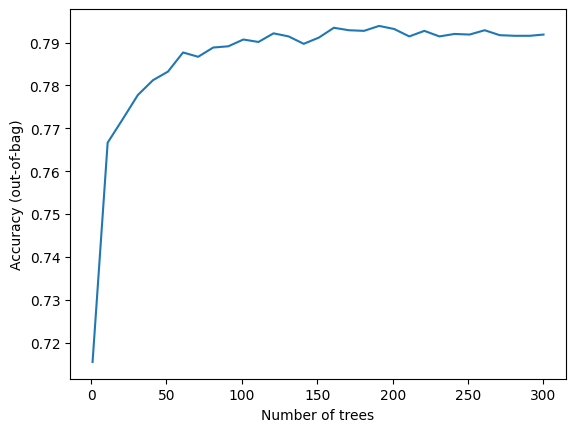

In [71]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

> 알게 된 점


```
logs = rf.make_inspector().training_logs()
```

* rf 랜덤포레스트 모델에 대해 **모델 학습 로그(logs)**를 가져옵니다.

* make_inspector()는 TF-DF의 **모델 내부 정보를 조사(inspect)**할 수 있는 도구이고,

* training_logs()는 트리 개수 증가에 따른 학습 정확도 등 기록된 로그 리스트를 반환합니다.

In [74]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6943, accuracy=0.791876710355754, loss=0.5519040138084438, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

> 알게 된 점

| 항목                 | 값        | 설명                                                     |
| ------------------ | -------- | ------------------------------------------------------ |
| **`num_examples`** | `6943`   | 평가에 사용된 데이터 샘플 수 (예: 검증셋의 크기)                          |
| **`accuracy`**     | `0.7918` | **정확도** — 전체 예측 중 **정답 비율**: 약 79.2%                   |
| **`loss`**         | `0.5519` | 모델의 **손실값 (loss)** — 낮을수록 좋음 (여기선 로그 손실 가능성 있음)        |
| **`rmse`**         | `None`   | **평균 제곱근 오차** (회귀 문제에서 사용). 여기선 분류 문제이므로 없음            |
| **`ndcg`**         | `None`   | **정규화된 DCG (Ranking 평가 지표)** — 사용되지 않음                 |
| **`aucs`**         | `None`   | **AUC 점수 (Area Under Curve)** — ROC 커브의 면적. 여기선 측정 안 함 |
| **`auuc`**         | `None`   | **AUUC (uplift 모델 평가)** — 사용되지 않음                      |
| **`qini`**         | `None`   | **Qini 계수 (uplift 평가 지표)** — 사용되지 않음                   |


> TF-DF의 분류 문제에서 loss란?

| 지표       | 의미                   | 방향      |
| -------- | -------------------- | ------- |
| Accuracy | 맞춘 비율                | 높을수록 좋음 |
| Loss     | 예측의 확신도 + 일치도 기반의 오차 | 낮을수록 좋음 |

In [75]:
evaluation = rf.evaluate(x=valid_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - accuracy: 0.7954
loss: 0.0000
accuracy: 0.7954


## Variable importances

In [78]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


예를 들어, **변수 중요도 유형 중 하나인 NUM_AS_ROOT**에 대해 중요한 특성(변수)들을 출력해보겠습니다.

NUM_AS_ROOT의 중요도 점수가 클수록, 해당 특성이 모델의 예측 결과에 더 큰 영향을 미쳤다는 의미입니다.

기본적으로 이 목록은 가장 중요한 특성부터 덜 중요한 특성 순으로 정렬되어 출력됩니다.

출력 결과를 보면, 목록의 가장 위에 있는 특성은 랜덤 포레스트의 여러 트리들에서 루트 노드(root node)로 가장 자주 사용된 특성이라는 것을 알 수 있습니다.

> 알게 된 점

| 기준                   | 무엇을 평가?         | 점수가 높을수록 의미하는 것     |
| -------------------- | --------------- | ------------------- |
| `INV_MEAN_MIN_DEPTH` | 루트에 얼마나 가까운가    | 예측 초기에 많이 쓰임        |
| `SUM_SCORE`          | 예측 성능 개선 기여도    | 성능 향상에 크게 기여        |
| `NUM_AS_ROOT`        | 루트 노드로 쓰인 횟수    | 트리 전체의 첫 기준으로 자주 등장 |
| `NUM_NODES`          | 전체 트리에서 쓰인 총 횟수 | 다양한 위치에서 고르게 영향     |


In [79]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 123.0),
 ("RoomService" (1; #7), 57.0),
 ("Spa" (1; #10), 55.0),
 ("VRDeck" (1; #12), 39.0),
 ("ShoppingMall" (1; #8), 16.0),
 ("FoodCourt" (1; #5), 6.0),
 ("Deck" (4; #3), 2.0),
 ("HomePlanet" (4; #6), 2.0)]

| 순위 | 특성 이름          | 루트 노드로 사용된 횟수 | 해석 요약                           |
| -- | -------------- | ------------- | ------------------------------- |
| 1  | `CryoSleep`    | **123회**      | 대부분의 트리에서 **첫 기준으로 가장 많이 선택됨**  |
| 2  | `RoomService`  | 57회           | **고가 소비 여부**도 예측에서 중요한 초기 분기 기준 |
| 3  | `Spa`          | 55회           | 스파 이용 여부 역시 예측 시작 시 많이 고려됨      |
| 4  | `VRDeck`       | 39회           | 가상현실 이용 → 특정 행동 패턴과 연관          |
| 5  | `ShoppingMall` | 16회           | 쇼핑 소비도 부분적으로 중요함                |
| 6  | `FoodCourt`    | 6회            | 식사 소비는 덜 중요하게 쓰임                |
| 7  | `Deck`         | 2회            | 객실 위치는 거의 루트로 쓰이지 않음            |
| 8  | `HomePlanet`   | 2회            | 출발 행성도 루트에서는 별로 안 쓰임            |


> 나의 의문점

***CryoSleep빼고는 연속형 변수가 중요도에 높게 자리잡은 것 같아!!***

✅ 1. 연속형 변수는 분기 조건을 더 다양하게 만들 수 있음
예: RoomService > 1000 / RoomService <= 500 / RoomService in (0, 100, 500)

즉, 트리 분기를 더 유연하고 세밀하게 할 수 있음

반면 범주형은 고정된 값들로 나누기 때문에 정보 이득이 덜 뚜렷할 수 있음

✅ 2. 연속형 변수는 예측력 있는 패턴이 내재되어 있을 가능성이 큼
예: 돈을 많이 쓴 사람일수록 VIP → 이동 여부와 상관관계 생길 수 있음

Spa, VRDeck, ShoppingMall 등은 모두 소비 활동의 양을 나타냄


## Submission

In [87]:
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/test.csv')
submission_id = test_df.PassengerId

# Replace NaN values with zero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 1s 112ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [88]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


## 결측치는 어떻게 처리되었을까

In [90]:
inspector = rf.make_inspector()
spec = inspector.dataspec

In [93]:
spec = rf.make_inspector().dataspec

for feature in spec.columns:
    if feature.count_nas > 0:
        print(f"📌 {feature.name}")
        print(f"  · 타입: {feature.type}")
        print(f"  · 결측값 개수: {feature.count_nas}")
        print()

📌 Age
  · 타입: 1
  · 결측값 개수: 149

📌 Cabin_num
  · 타입: 4
  · 결측값 개수: 162

📌 Deck
  · 타입: 4
  · 결측값 개수: 162

📌 Destination
  · 타입: 4
  · 결측값 개수: 140

📌 HomePlanet
  · 타입: 4
  · 결측값 개수: 158

📌 RoomService
  · 타입: 1
  · 결측값 개수: 149

📌 Side
  · 타입: 4
  · 결측값 개수: 162



> 이게 가능한거야?

**❗️결측값이 있다 = 전처리 안 된 게 아님!**
TF-DF는 내부적으로 결측값이 있는 특성을 무시하지 않습니다.

대신, 다음과 같은 방식으로 자동 처리합니다:

변수 유형	처리 방식
수치형 (NUMERICAL)	"결측이면 따로 분기"를 만들거나, 평균값 또는 surrogate split 사용
범주형 (CATEGORICAL)	"__NA__" 같은 특수 카테고리로 처리하여 분기 가능하게 함

→ 그래서 count_nas > 0이어도 모델은 문제 없이 학습되고 예측 가능합니다.

<br>

> 왜?

결정트리 기반 모델은 본질적으로 결측값에 강합니다.
왜냐하면, 결측값도 하나의 분기 조건으로 처리할 수 있기 때문이에요.


*Q. 음 결측된 값을 애매하게 값 채우는 거보다 하나의 카테고리로 빼고 분기로 결정하는거지?*

*A. ChatGPT의 말: 정확해요! 👏👏. 당신이 말한 게 바로 트리 모델의 결측값 처리의 핵심 원리입니다.*

<br>


> 예시

```
if Age is missing:
    go left
else:
    if Age > 20:
        go right

```

```
if HomePlanet == "Earth":
    go left
elif HomePlanet == "__NA__":
    go right
```

In [94]:
inspector = rf.make_inspector()
print(inspector.extract_tree(tree_idx=0).root)

(VRDeck >= 0.5; miss=True, score=0.063778817653656)
    ├─(pos)─ (RoomService >= 366.0; miss=False, score=0.009578573517501354)
    │        ├─(pos)─ (FoodCourt >= 2171.5; miss=False, score=0.028626281768083572)
    │        │        ├─(pos)─ (Cabin_num in ['24', '27', '238', '218', '80', '49', '35', '319', '195', '31', '275', '349']; miss=False, score=0.3490889370441437)
    │        │        │        ├─(pos)─ (FoodCourt >= 2989.5; miss=False, score=0.2590540051460266)
    │        │        │        │        ├─(pos)─ ProbabilityValue([1.0, 0.0],n=14.0) (idx=380)
    │        │        │        │        └─(neg)─ ProbabilityValue([0.4, 0.6],n=5.0) (idx=379)
    │        │        │        └─(neg)─ (Age >= 27.5; miss=True, score=0.07741591334342957)
    │        │        │                 ├─(pos)─ ProbabilityValue([0.0, 1.0],n=11.0) (idx=378)
    │        │        │                 └─(neg)─ ProbabilityValue([0.2, 0.8],n=5.0) (idx=377)
    │        │        └─(neg)─ (Age >= 24.5; miss=True,

> 해석

| 키워드          | 의미                                       |
| ------------ | ---------------------------------------- |
| `miss=True`  | 해당 노드로 분기할 때, **해당 특성이 NaN인 경우도 포함**됨    |
| `miss=False` | 해당 특성이 NaN이면 **이 분기를 타지 않음 (다른 경로로 빠짐)** |


## 추가) Pipeline 생성



```
import pandas as pd
import tensorflow_decision_forests as tfdf
import numpy as np

# ----------------------------
# 1. 데이터 로드 & 전처리 함수
# ----------------------------
def preprocess(df, is_train=True):
    # 결측값 처리 (boolean -> 0)
    df[['VIP', 'CryoSleep']] = df[['VIP', 'CryoSleep']].fillna(0)
    
    # Cabin → Deck, Cabin_num, Side 분리
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df.drop('Cabin', axis=1, inplace=True)

    # boolean → int
    df['VIP'] = df['VIP'].astype(int)
    df['CryoSleep'] = df['CryoSleep'].astype(int)
    
    # 학습 데이터일 경우 타깃 분리
    if is_train:
        label = df.pop('Transported')  # target 분리
        return df, label
    else:
        return df

# ----------------------------
# 2. 학습 데이터 불러오기 & 전처리
# ----------------------------
train_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/train.csv')
train_df, train_label = preprocess(train_df)

# Pandas → TF Dataset 변환
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=train_label)

# ----------------------------
# 3. 모델 학습
# ----------------------------
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])
rf.fit(train_ds)

# ----------------------------
# 4. 테스트 데이터 불러오기 & 전처리
# ----------------------------
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/test.csv')
submission_id = test_df.PassengerId.copy()
test_df = preprocess(test_df, is_train=False)

# Pandas → TF Dataset 변환
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# ----------------------------
# 5. 예측 수행
# ----------------------------
predictions = rf.predict(test_ds)
binary_preds = (predictions > 0.5).astype(bool)

# ----------------------------
# 6. 제출 파일 생성
# ----------------------------
submission = pd.DataFrame({
    'PassengerId': submission_id,
    'Transported': binary_preds.squeeze()
})

submission.to_csv('submission.csv', index=False)
print("✅ 제출 파일 저장 완료: submission.csv")
```

